<h1>Imports</h1>

In [1]:
import numpy as np

from numpy.linalg import inv, pinv

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

<h1>Data</h1>

(3L, 100L)
(3L,)


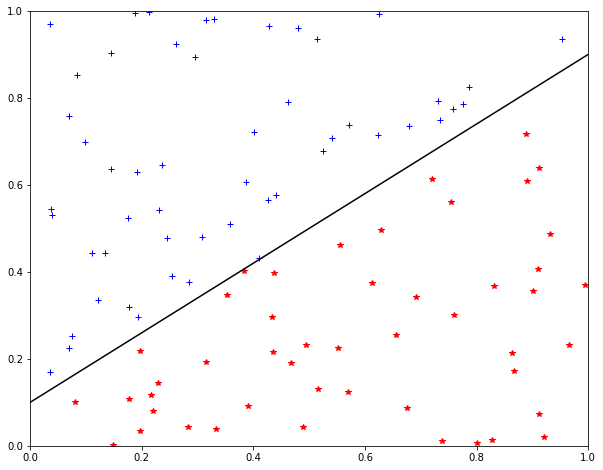

In [18]:
w_1 = 8.0 #w_1
w_2p = 10.0 #w_2'

m = w_1/w_2p
c = 0.1

w_0 = w_2p*c
w_2 = -w_2p

w_true = np.array([w_0, w_1, w_2])

N = 100

x = np.random.rand(3,N)
x[0,:] = 1

print x.shape #should print (3L, 10L) [windows] or (3,10) [linux] showing 3x10 matrix
print w_true.shape #should pring (3L,) [windows] or (3,) [linux] showing 3x1 matrix
#note that it is row vector instead or column

#now let us compute the labels
y_true = (w_true.dot(x)>0)*1.0+(w_true.dot(x)<=0)*-1.0

marker = {}
marker[-1.0] = '+b'
marker[1.0] = '*r'

for i in range(N):
    plt.plot(x[1,i],x[2,i],marker[y_true[i]])

x_1__ = np.arange(0,1.0,0.001)
x_2__ = m*x_1__+c #the line that separates the classes


plt.plot(x_1__,x_2__,'-k')
plt.xlim([0,1.0])
plt.ylim([0,1.0])

plt.show()

#you should see a perfectly separed data

<h1>Logistic Regression with Maximum Log-Likelihood and Gradient Descent</h1>

In [3]:
def logreg_mle(x,y_true,learning_rate,max_iter=1000,w_est=None):
    '''
    Logistic Regression with MLE and GD algorithm
    input:
    x = NxNs matrix, data variable
    y_true = Ns matrix, ground truth labels
    learning_rate = gradient descent hyperparameter
    max_iter = maximum number of iteration
    
    Ns = number of samples
    N = dimension of features
    
    output:
    w_est = 1xN matrix, estimated weight
    n_miscls = misclassified examples in each iteration
    i = the number of iterations taken to converge,
        i==max_iter indicates possible non-convergence
    '''
    w_N = len(x)
    
    if w_est is None:
        w_est = np.random.rand(1,w_N)
    
    n_miscls = []
    
    for i in range(max_iter):
        y_est = (w_est.dot(x)>0)*1.0+(w_est.dot(x)<=0)*-1.0 #1x100
        y_est = y_est[0] #100 length array from 1x100 matrix
        
        mis_cls = np.sum((y_est*y_true)<0)
        n_miscls.append(mis_cls)
        
        if mis_cls == 0:
            break
        
        grad_E = - np.mean(y_true*x / (1 + np.exp(y_true*w_est.dot(x))),axis=1)
        w_est = w_est - learning_rate * grad_E / np.sqrt(np.sum(grad_E*grad_E))
        
        if (i+1)%100 == 0 :
            learning_rate /= 2
    
    return w_est,n_miscls,i

In [19]:
w_N = 3

max_iter = 1000
learning_rate = 0.6

w_est,n_miscls,i = logreg_mle(x,y_true,0.6)

print 'The algorithm converged after ', i, ' iterations'  

The algorithm converged after  7  iterations


<h1>Peformance</h1>

(1L, 3L)
0.788327942751 0.100545589152


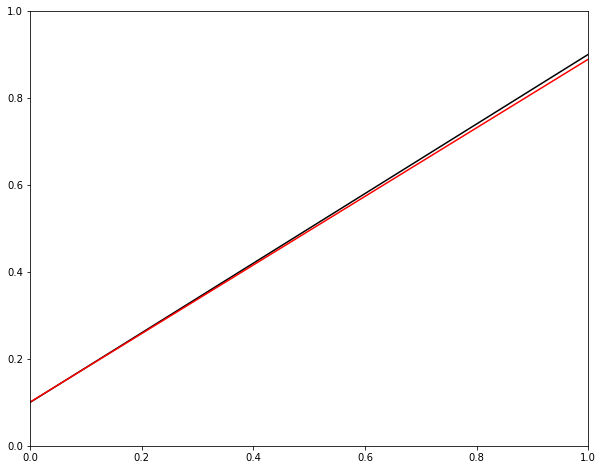

In [20]:
print w_est.shape
w_est2 = w_est.reshape(len(w_true))
m_est = w_est2[1]/np.abs(w_est2[2])
c_est = w_est2[0]/np.abs(w_est2[2])

print m_est, c_est

x_2_est = m_est*x_1__ + c_est

plt.plot(x_1__,x_2__, 'k')
plt.plot(x_1__,x_2_est,'r')
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
plt.show()

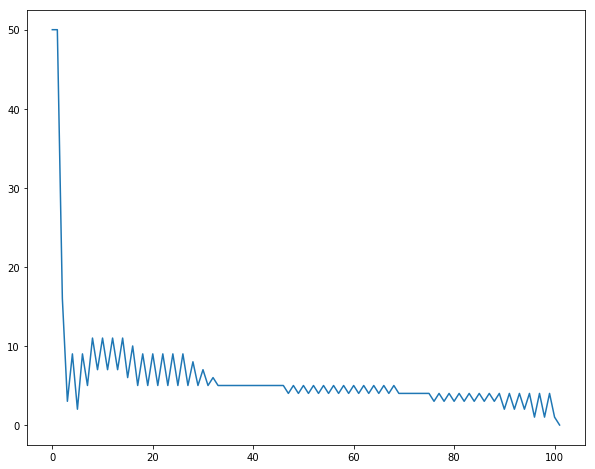

In [6]:
plt.plot(n_miscls)